<a href="https://colab.research.google.com/github/asaputra1995/ump-indonesia-2022-2023/blob/main/UMP_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gspread
import pandas as pd
from google.oauth2.credentials import Credentials
from google.auth.transport.requests import Request

In [2]:
df = pd.read_table('/content/drive/MyDrive/Personal Project/UMP Indonesia/cred.txt')

In [3]:
access_token = df[df['variable']=='access_token'].iloc[0,1]
refresh_token = df[df['variable']=='refresh_token'].iloc[0,1]
client_id = df[df['variable']=='client_id'].iloc[0,1]
client_secret = df[df['variable']=='client_secret'].iloc[0,1]

In [4]:
import geopandas as gpd

In [5]:
gdf = gpd.read_file('/content/drive/MyDrive/Personal Project/UMP Indonesia/indonesia.geojson')

<Axes: >

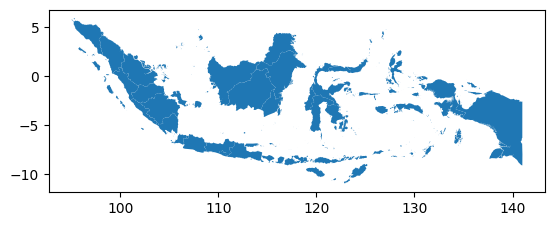

In [6]:
gdf.plot()

In [7]:
gdf.head()

,cartodb_id,country,id_1,slug,state,geometry
0,16,Indonesia,1,indonesia-aceh,Aceh,"MULTIPOLYGON (((97.97681 4.62750, 98.00173 4.6..."
1,2,Indonesia,31,indonesia-sumaterabarat,Sumatera Barat,"MULTIPOLYGON (((99.17167 -1.50250, 99.20500 -1..."
2,8,Indonesia,34,indonesia-yogyakarta,Yogyakarta,"MULTIPOLYGON (((110.70204 -8.18505, 110.43472 ..."
3,20,Indonesia,33,indonesia-sumaterautara,Sumatera Utara,"MULTIPOLYGON (((98.71384 3.76947, 99.05473 3.6..."
4,7,Indonesia,3,indonesia-bangkabelitung,Bangka-Belitung,"MULTIPOLYGON (((105.34754 -1.84469, 105.39079 ..."


In [11]:
spreadsheet_id = '107uRMlbKfmnOMC-6iIuZIEzRlppWf_i-hqi1uzAvlP8'
sheet_name = 'Sheet1'  # Replace with your sheet name

# Create credentials object using the access token and refresh token
creds = Credentials(
    token=access_token,
    refresh_token=refresh_token,
    client_id=client_id,
    client_secret=client_secret,
    token_uri='https://oauth2.googleapis.com/token'
)

# Refresh token if needed
if not creds.valid:
    if creds.expired and creds.refresh_token:
        creds.refresh(Request())

# Authorize the client with gspread
client = gspread.authorize(creds)

# Open the Google Sheet by its ID
spreadsheet = client.open_by_key(spreadsheet_id)

# Open the specific sheet by its name
sheet = spreadsheet.worksheet(sheet_name)

# Get the range A1:C30 from the sheet
cell_range = sheet.get('A1:D')

# Convert the data to a DataFrame
# If the range contains headers, you can use the first row as column headers
df = pd.DataFrame(cell_range[1:], columns=cell_range[0])

# Print the DataFrame
df.head()


,Provinsi,UMP 2022 (Rp),UMP 2023 (Rp),Kenaikan (%)
0,Aceh,"3,165,031","3,413,666",7.87
1,Sumatera Utara,"2,522,609","2,710,493",7.45
2,Sumatera Barat,"2,512,539","2,742,476",9.15
3,Riau,"2,938,564","3,008,273",2.37
4,Kepulauan Riau,"3,005,460","3,279,194",9.1


In [13]:
print(gdf['state'].unique())
print(df['Provinsi'].unique())

['Aceh' 'Sumatera Barat' 'Yogyakarta' 'Sumatera Utara' 'Bangka-Belitung'
 'Papua Barat' 'Jawa Timur' 'Kalimantan Barat' 'Kalimantan Selatan'
 'Kalimantan Timur' 'Kepulauan Riau' 'Lampung' 'Maluku' 'Maluku Utara'
 'Nusa Tenggara Barat' 'Nusa Tenggara Timur' 'Papua' 'Riau'
 'Sulawesi Selatan' 'Bengkulu' 'Sulawesi Tengah' 'Sulawesi Utara'
 'Sulawesi Tenggara' 'Bali' 'Banten' 'Gorontalo' 'Jakarta Raya' 'Jambi'
 'Jawa Barat' 'Jawa Tengah' 'Kalimantan Tengah' 'Sulawesi Barat'
 'Sumatera Selatan' 'Kalimantan Utara']
['Aceh' 'Sumatera Utara' 'Sumatera Barat' 'Riau' 'Kepulauan Riau' 'Jambi'
 'Sumatera Selatan' 'Bangka Belitung' 'Bengkulu' 'Lampung' 'DKI Jakarta'
 'Jawa Barat' 'Banten' 'Jawa Tengah' 'DI Yogyakarta' 'Jawa Timur' 'Bali'
 'Nusa Tenggara Barat' 'Nusa Tenggara Timur' 'Kalimantan Barat'
 'Kalimantan Tengah' 'Kalimantan Selatan' 'Kalimantan Timur'
 'Kalimantan Utara' 'Sulawesi Utara' 'Sulawesi Tengah' 'Sulawesi Selatan'
 'Sulawesi Tenggara' 'Gorontalo' 'Sulawesi Barat' 'Maluku' 'Maluku

In [14]:
gdf['state'] = gdf['state'].replace({
    'Bangka-Belitung' : 'Kepulauan Riau',
    'Jakarta Raya' : 'DKI Jakarta',
    'Yogyakarta' : 'DI Yogyakarta'
})

In [15]:
gdf_merge = gdf.merge(df, left_on='state', right_on='Provinsi')

In [16]:
gdf_merge

,cartodb_id,country,id_1,slug,state,geometry,Provinsi,UMP 2022 (Rp),UMP 2023 (Rp),Kenaikan (%)
0,16,Indonesia,1,indonesia-aceh,Aceh,"MULTIPOLYGON (((97.97681 4.62750, 98.00173 4.6...",Aceh,"3,165,031","3,413,666",7.87
1,2,Indonesia,31,indonesia-sumaterabarat,Sumatera Barat,"MULTIPOLYGON (((99.17167 -1.50250, 99.20500 -1...",Sumatera Barat,"2,512,539","2,742,476",9.15
2,8,Indonesia,34,indonesia-yogyakarta,DI Yogyakarta,"MULTIPOLYGON (((110.70204 -8.18505, 110.43472 ...",DI Yogyakarta,"1,840,915","1,981,782",7.65
3,20,Indonesia,33,indonesia-sumaterautara,Sumatera Utara,"MULTIPOLYGON (((98.71384 3.76947, 99.05473 3.6...",Sumatera Utara,"2,522,609","2,710,493",7.45
4,7,Indonesia,3,indonesia-bangkabelitung,Kepulauan Riau,"MULTIPOLYGON (((105.34754 -1.84469, 105.39079 ...",Kepulauan Riau,"3,005,460","3,279,194",9.1
5,9,Indonesia,18,indonesia-kepulauanriau,Kepulauan Riau,"MULTIPOLYGON (((103.99194 1.13472, 104.01361 1...",Kepulauan Riau,"3,005,460","3,279,194",9.1
6,5,Indonesia,7,indonesia-papuabarat,Papua Barat,"MULTIPOLYGON (((134.23334 -1.74194, 134.22139 ...",Papua Barat,"3,200,000","3,280,000",2.5
7,4,Indonesia,12,indonesia-jawatimur,Jawa Timur,"MULTIPOLYGON (((113.59208 -7.71486, 113.66695 ...",Jawa Timur,"1,891,567","2,040,654",7.88
8,10,Indonesia,13,indonesia-kalimantanbarat,Kalimantan Barat,"MULTIPOLYGON (((108.92462 0.55861, 108.92167 0...",Kalimantan Barat,"2,434,328","2,599,099",6.77
9,3,Indonesia,14,indonesia-kalimantanselatan,Kalimantan Selatan,"MULTIPOLYGON (((114.51278 -3.54225, 114.51806 ...",Kalimantan Selatan,"2,906,473","3,048,035",4.88


<Axes: >

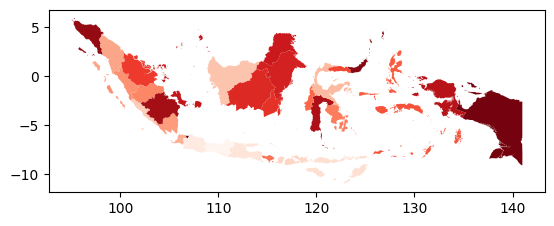

In [20]:
gdf_merge.plot(column = 'UMP 2023 (Rp)', cmap = 'Reds')